### Датасет про супермаркет
Не знал что мне выбрать. Вязл в итоге случайно попавшийся из Kaggle

## Код
В коде ниже я скачиваю файл с помощью команды из Kaggle распоковываю его, а потом удалаю

In [2]:
from zipfile import ZipFile
import os

!kaggle datasets download -d aungpyaeap/supermarket-sales

filename = "supermarket-sales.zip"

with ZipFile(filename, "r") as file:
    file.extractall()
    
os.remove(filename)

Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
License(s): other




  0%|          | 0.00/35.9k [00:00<?, ?B/s]
100%|##########| 35.9k/35.9k [00:00<00:00, 1.24MB/s]


Тут просто библиотеки и размер графиков

In [18]:
import pandas as pd 
import seaborn as sns 
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 12, 8

### Начинеам собственно работу с данными

In [4]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Сразу удалаю ненужную инфу, которую никак интерпритировать (наверное)

In [5]:
df.drop(["Invoice ID", "Date", "Time"], axis=1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


Для машины работать с циферками лучше, поэтому перевожу строки в цифры.

В столбцах не так много различных значений, так что даже для челевека это остается довольно читабельным

In [6]:
def string_to_numeric(df: pd.DataFrame, name: str):
    temp = {}
    feature = df[name].unique()
    for num in range(len(df[name].unique())):
        temp[feature[num]] = num
    df[name] = df[name].map(temp)

columns_to_change = ["Branch", "Customer type", "Gender", "Payment", "City", "Product line"]
for name in columns_to_change:
    print(f"{df[name].nunique()} - {df[name].unique()}")
    string_to_numeric(df, name)
    
df.head()

3 - ['A' 'C' 'B']
2 - ['Member' 'Normal']
2 - ['Female' 'Male']
3 - ['Ewallet' 'Cash' 'Credit card']
3 - ['Yangon' 'Naypyitaw' 'Mandalay']
6 - ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,1,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,4.761905,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,4.761905,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3


Смотрим на корелляцию признаков, чтобы убрать те, которые сильно схожи с другими. Зачем нам признак, если он дает такую же информацию как и другой?

<Axes: >

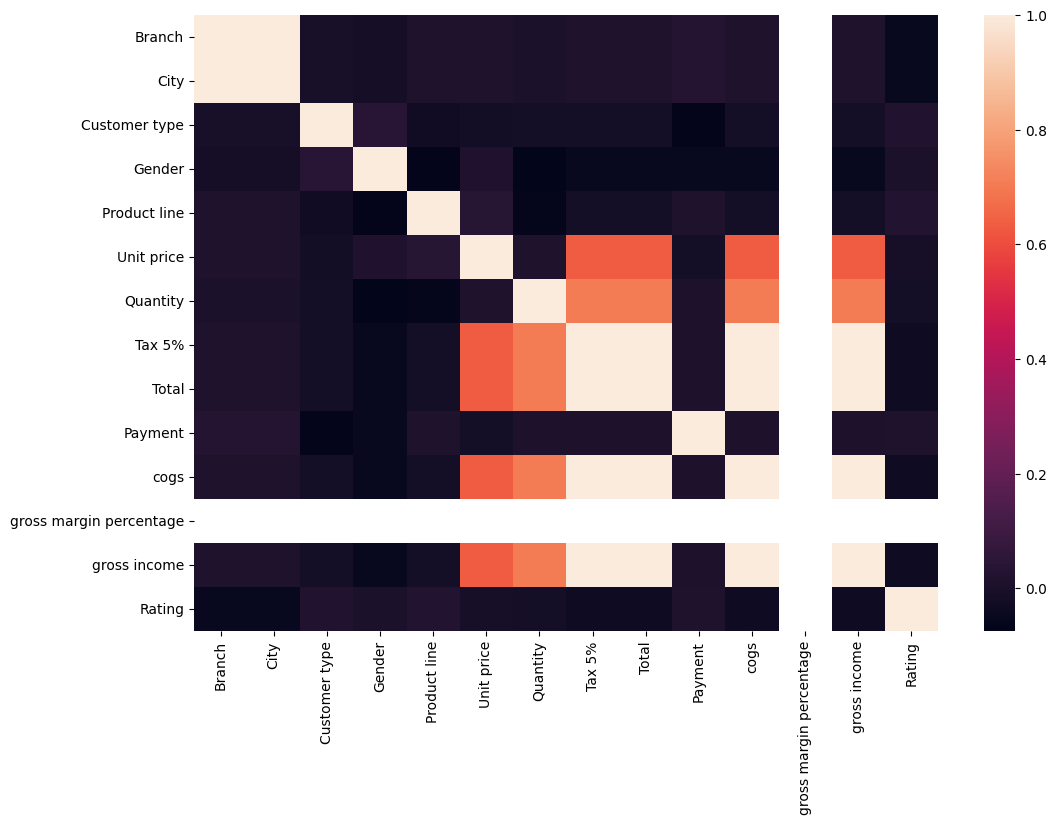

In [7]:
sns.heatmap(df.corr())

### Что можно сказать по графику сверху

1) Branch and City - можно сказать одно и тоже, значит что можно скинуть
2) Куча признаков связанных с деньгами и все он кореллируют - оставлю Total, как самый понятный и информативный из них
3) Unit price and Quantity оставлю так, как они по моему мнению пригодяться


In [8]:
df.drop(["Branch", "Tax 5%", "cogs", "gross income"], axis=1, inplace=True)
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,gross margin percentage,Rating
0,0,0,0,0,74.69,7,548.9715,0,4.761905,9.1
1,1,1,0,1,15.28,5,80.2200,1,4.761905,9.6
2,0,1,1,2,46.33,7,340.5255,2,4.761905,7.4
3,0,0,1,0,58.22,8,489.0480,0,4.761905,8.4
4,0,1,1,3,86.31,7,634.3785,0,4.761905,5.3


Только сейчас обратил внимание на странный признак - gross margin percentage, в котором просто одна цифра. Разумеется этот столбец мы тоже убираем

In [9]:
print(df["gross margin percentage"].nunique())
df.drop("gross margin percentage", axis=1, inplace=True)
df.head()

1


,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating
0,0,0,0,0,74.69,7,548.9715,0,9.1
1,1,1,0,1,15.28,5,80.2200,1,9.6
2,0,1,1,2,46.33,7,340.5255,2,7.4
3,0,0,1,0,58.22,8,489.0480,0,8.4
4,0,1,1,3,86.31,7,634.3785,0,5.3


<Axes: >

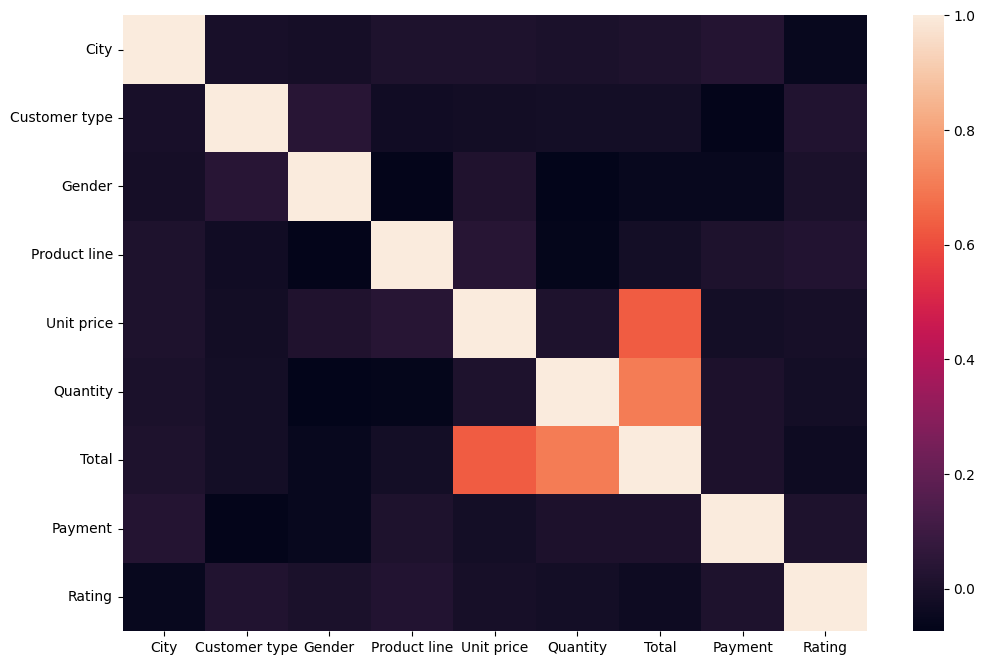

In [10]:
sns.heatmap(df.corr())

array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Customer type'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Product line'}>,
        <Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Payment'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

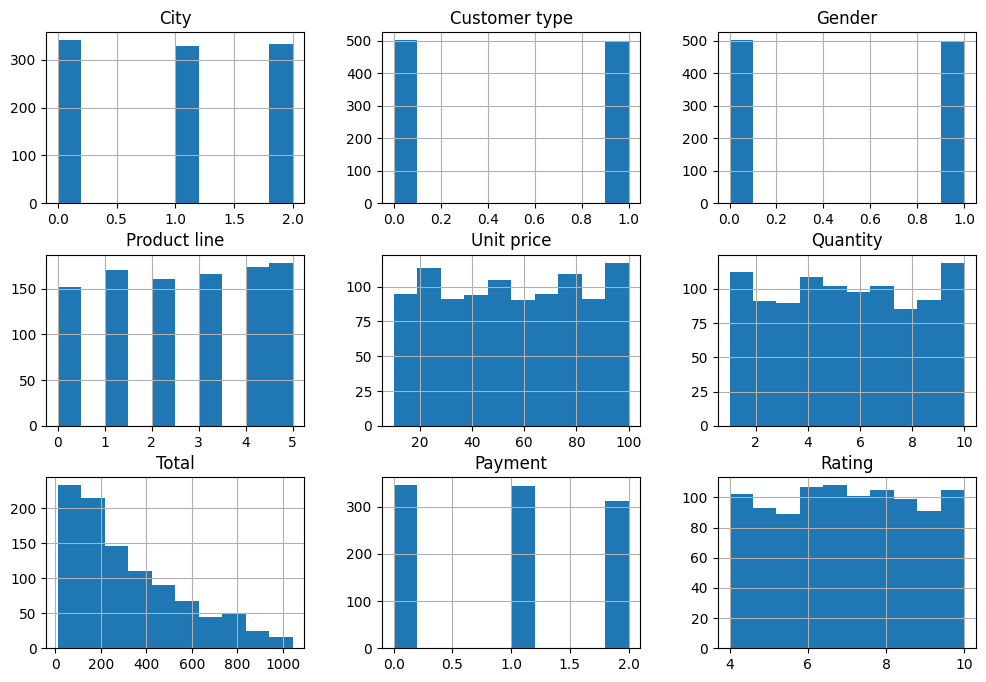

In [11]:
df.hist()

Я немного удивлся гистограмамм. Все данные ровно распределены, нет никаких скачков - они просто идеальные, как буто кто то спицеально так сделал

<Axes: xlabel='Gender', ylabel='Unit price'>

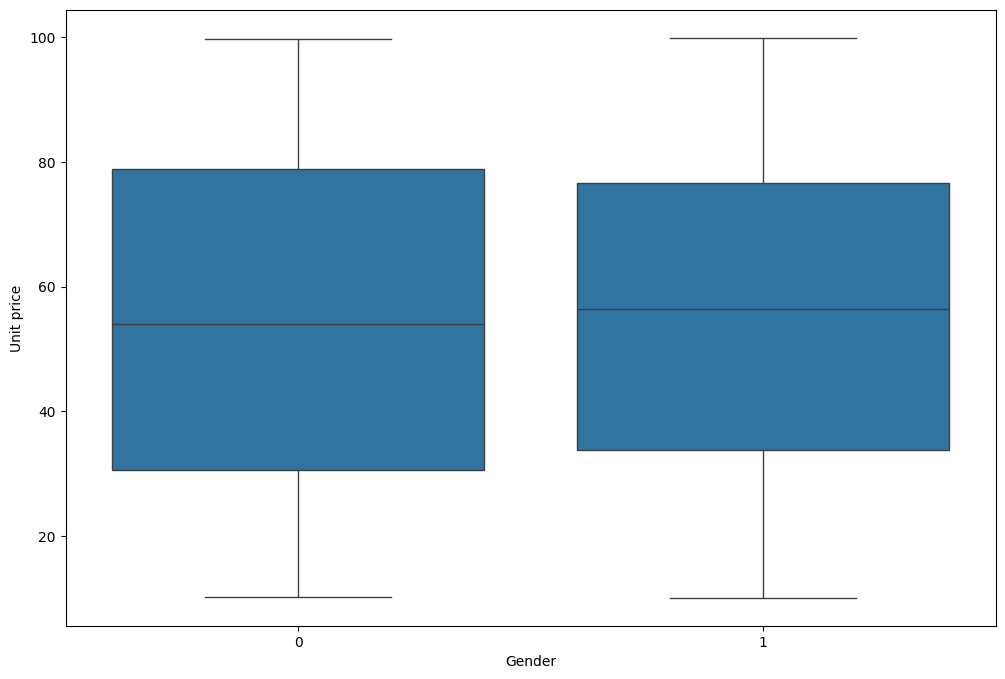

In [21]:
sns.boxplot(x="Gender", y="Unit price", data=df)

<Axes: xlabel='Gender', ylabel='count'>

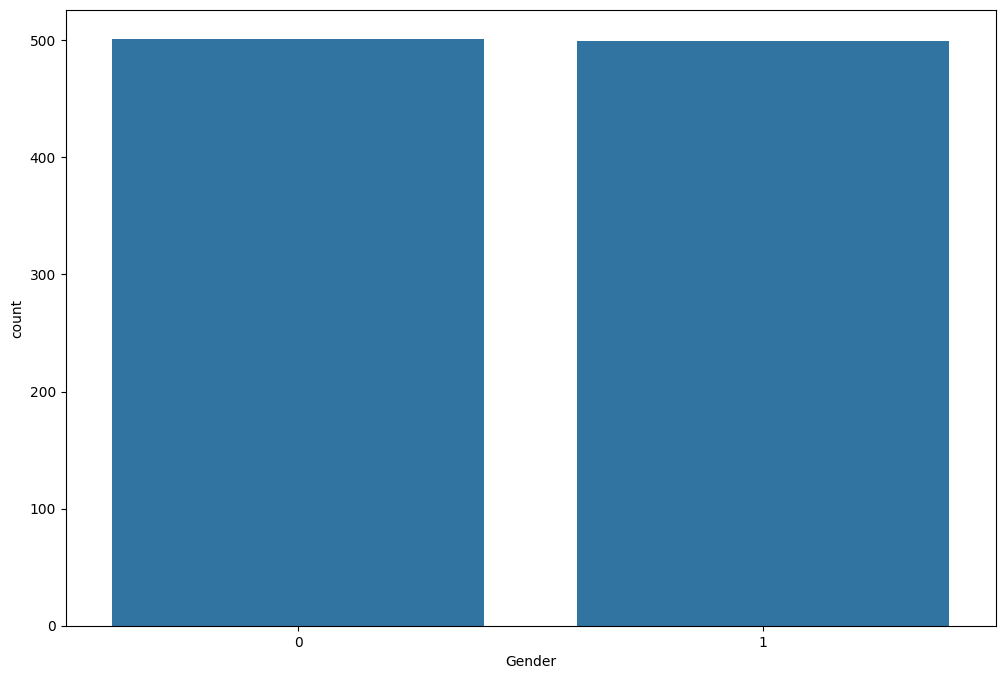

In [16]:
sns.countplot(x="Gender", data=df)

Попробуем посмотреть завивсит ли от пола какую продкуцию выбирают

<Axes: xlabel='Product line', ylabel='count'>

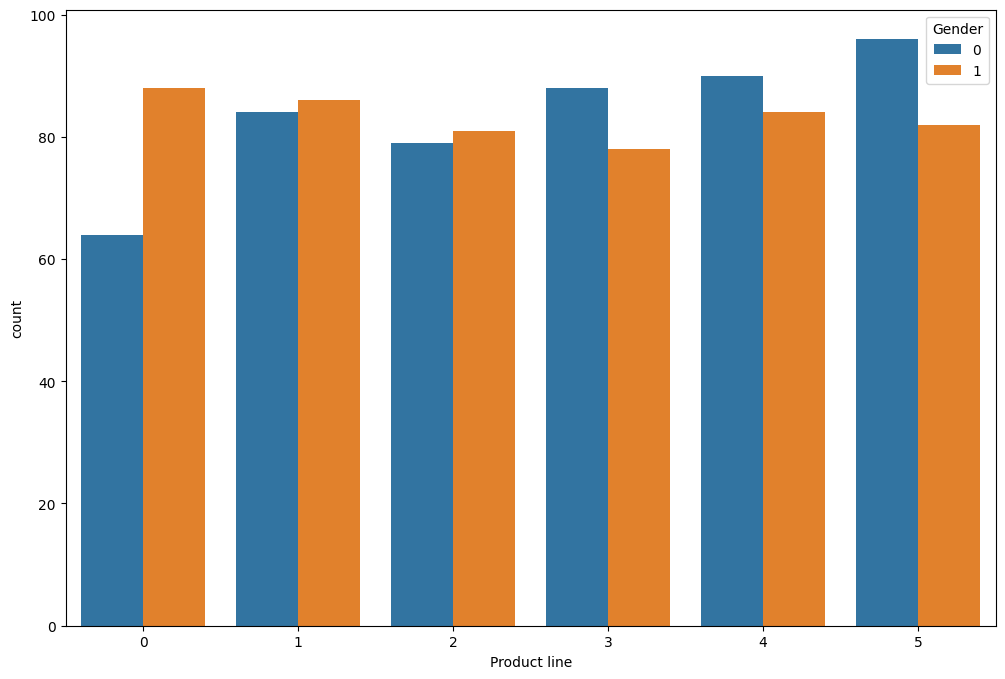

In [17]:
 sns.countplot(x="Product line", hue="Gender", data=df)

### Опять почти все ровно. По этому графику только понятно, что мужчину больше покупают что то для здоровья и красоты (???), а женщины - больше украшений
#### А еще стала ясно, что лучше менять даные на циферки перед обучением модели, а не вовремя анализа

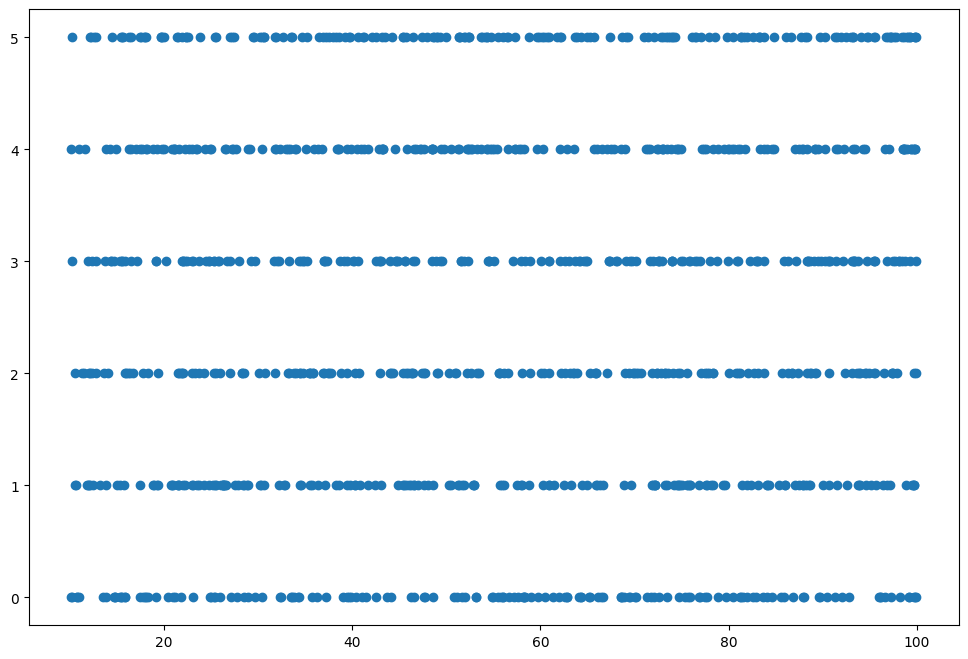

In [23]:
plt.scatter(df["Unit price"], df["Product line"])

## И опять минмальные различия.....
Сверху я сравнил сколько денег тратят на определеный вид продукции

Text(0.5, 1.0, 'How much money spend on Product line')

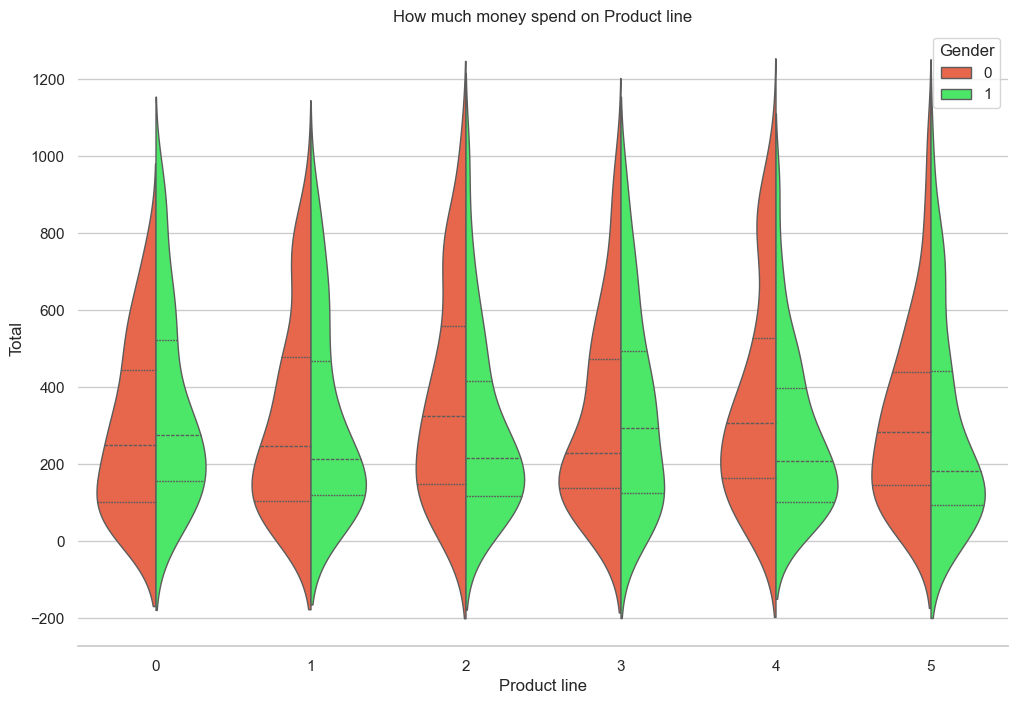

In [32]:
sns.set_theme(style="whitegrid")

custom_color = ["#FF5733", "#33FF57"]

sns.violinplot(data=df, x="Product line", y="Total", 
               hue="Gender", split=True,
               inner="quart", palette=custom_color, linewidth=1)

sns.despine(left=True)
plt.title("How much money spend on Product line")

# И опять все одинаковое, надо брать другой набор данных...

In [33]:
os.remove("supermarket_sales - Sheet1.csv") #Удалил файл чтоб ты не мучился